Computer Assignment 4

In this project we work on a dataset containing information about properties and the price of the property. Since the dataset could be faulty like it could have missing datas, first we need to preprocess it. After preprocessing, we will proceed to try different models and afer tuning them, we use them for prediction of the test data We predict house prices for the houses that have not been priced.

Phase 0. 
In this phase we try to visualize the data set.

In [1015]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np
import math
import io

In [1016]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 

In [1017]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

q1.

In [1018]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Using describe we can have information about count(number of data in each row), mean(average of datas in a column) and other information sbout data set like std, min, max, count of datas below 25%, etc.
This function shows the results for the numeric columns.

In [1019]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

info function gives of the number of datas we have in each row, which we can also see in the describe function. It helps us find out about the missig datas.

q2.

In [1020]:
num_of_rows = len(train.iloc[:,0])

In [1021]:
num_of_rows

1460

Here we get the number of NANs in each column. Since there are columns except 'LotFrontage', 'GarageYrBlt', 'MasVnrType', 'MasVnrArea', 'Electrical' that use 'NA' we have to remove the NAs counted from those columns.             

In [1022]:
count_nan = train.isna().sum()

Here we show the counted NAs before cleaning.

In [1023]:
count_nan = count_nan.sort_values()

In [1024]:
count_nan.tail(50)

Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
LotConfig           0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
MSSubClass          0
YearRemodAdd        0
Utilities           0
Electrical          1
MasVnrType          8
MasVnrArea          8
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
BsmtFinType2       38
BsmtExposure       38
GarageQual         81
GarageFinish       81
GarageYrBlt        81
GarageType         81
GarageCond         81
LotFrontage       259
FireplaceQ

Here we have NAs after cleaning.

In [1025]:
count_nan['BsmtQual']=0
count_nan['BsmtCond']=0
count_nan['BsmtFinType1']=0
count_nan['BsmtFinType2']=0
count_nan['BsmtExposure']=0
count_nan['GarageQual']=0
count_nan['GarageFinish']=0
count_nan['GarageType']=0
count_nan['GarageCond']=0
count_nan['FireplaceQu']=0
count_nan['Fence']=0
count_nan['Alley']=0
count_nan['MiscFeature']=0
count_nan['PoolQC']=0

In [1026]:
count_nan.tail(50)

Fireplaces         0
EnclosedPorch      0
BsmtFinSF2         0
HeatingQC          0
SalePrice          0
LandSlope          0
LandContour        0
LotShape           0
Neighborhood       0
Condition1         0
Street             0
LotArea            0
MSZoning           0
BsmtFinSF1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
LotConfig          0
YearBuilt          0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
MSSubClass         0
YearRemodAdd       0
Utilities          0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual           0
BsmtCond           0
BsmtFinType1       0
BsmtFinType2       0
BsmtExposure       0
GarageQual         0
GarageFinish       0
GarageYrBlt       81
GarageType         0
GarageCond         0
LotFrontage      259
FireplaceQu        0
Fence              0
Alley        

In [1027]:
lost_data_each_feature_p = count_nan/num_of_rows

In [1028]:
lost_data_each_feature_p.tail(30)

YearBuilt       0.000000
RoofStyle       0.000000
RoofMatl        0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
ExterQual       0.000000
ExterCond       0.000000
Foundation      0.000000
MSSubClass      0.000000
YearRemodAdd    0.000000
Utilities       0.000000
Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.000000
BsmtCond        0.000000
BsmtFinType1    0.000000
BsmtFinType2    0.000000
BsmtExposure    0.000000
GarageQual      0.000000
GarageFinish    0.000000
GarageYrBlt     0.055479
GarageType      0.000000
GarageCond      0.000000
LotFrontage     0.177397
FireplaceQu     0.000000
Fence           0.000000
Alley           0.000000
MiscFeature     0.000000
PoolQC          0.000000
dtype: float64

Here we produce the function that will be used later on.

In [1029]:
def percent_lost_data(data):
    num_of_row = len(data.iloc[:,0])
    count_nans = data.isna().sum()
    count_nans = count_nan.sort_values()
    count_nans['BsmtQual']=0
    count_nans['BsmtCond']=0
    count_nans['BsmtFinType1']=0
    count_nans['BsmtFinType2']=0
    count_nans['BsmtExposure']=0
    count_nans['GarageQual']=0
    count_nans['GarageFinish']=0
    count_nans['GarageType']=0
    count_nans['GarageCond']=0
    count_nans['FireplaceQu']=0
    count_nans['Fence']=0
    count_nans['Alley']=0
    count_nans['MiscFeature']=0
    count_nans['PoolQC']=0
    lost_data_each_feature_p_f = count_nans/num_of_row
    return lost_data_each_feature_p_f


In [1030]:
percent_lost_data(train)

Id             0.000000
Exterior1st    0.000000
RoofMatl       0.000000
RoofStyle      0.000000
YearBuilt      0.000000
                 ...   
Electrical     0.000685
MasVnrArea     0.005479
MasVnrType     0.005479
GarageYrBlt    0.055479
LotFrontage    0.177397
Length: 81, dtype: float64

q3.

In this part, first we make the corrolation matrix and then draw a heatmap based on that. 

In [1031]:
def cor_show(df):
    cor = df.corr()
    plt.figure(figsize=(50,40))
    plt.matshow(cor,cmap=plt.cm.Reds)

    plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)
    plt.show()
    #Correlation with output variable
    cor_target = abs(cor['SalePrice'])
    return cor_target


<Figure size 3600x2880 with 0 Axes>

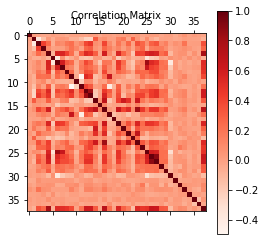

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [1032]:
cor_target_train = cor_show(train)
relevant_features = cor_target_train[cor_target_train>0.5]
relevant_features

Having the correlations of features we can see that output, which is the price of each house, has the most correlation with what features.
We can pick 'OverallQual', 'GrLivArea', 'GarageCars', and 'GarageArea' as the four features that are most influential on the price. 


q4.

In [1033]:
train_log_result=train

In [1034]:
train_log_result = train_log_result.assign(SalePrice=np.log2(train['SalePrice']))

In [1035]:
train_log_result

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal  17.669688  
1         5   2007        WD         Normal  17.469610  
2         9   2008        WD         Normal  17.769915  
3         2   2006        WD        Abnorml  17.095067  
4        12   2008        WD         Normal  17.931569  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal  17.416995  
1456      2   2010        WD         Normal  17.680030  
1457      5   2010        WD         Normal  18.023776  
1458      4   2010        WD         Normal  17.116801  
1459      6   2008        WD         Normal  17.170355  

[1460 rows x 81 columns]

<Figure size 3600x2880 with 0 Axes>

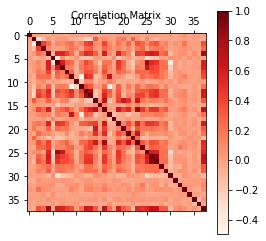

OverallQual     0.817184
YearBuilt       0.586570
YearRemodAdd    0.565608
TotalBsmtSF     0.612134
1stFlrSF        0.596981
GrLivArea       0.700927
FullBath        0.594771
TotRmsAbvGrd    0.534422
GarageYrBlt     0.541073
GarageCars      0.680625
GarageArea      0.650888
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [1036]:
cor_target_train = cor_show(train_log_result)
#Selecting highly correlated features
relevant_features = cor_target_train[cor_target_train>0.5]
relevant_features

After performing log on the prices of houses we can see that four most correlated features are:
'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea' .
We can see the vaule of correlation have changed but results has stayed the same. 
This is because the prices have changed relatively and because we choose the features by comparing them with each other the result stays the same.

q5. NO, it is not enough since we have only considered numerical features. There may be some non-numerical features that may be more correlated with the price. 

q6. 

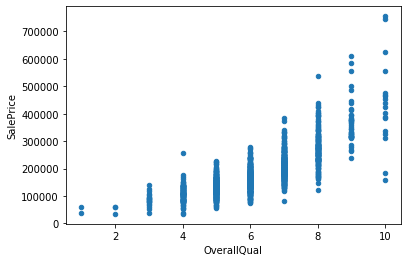

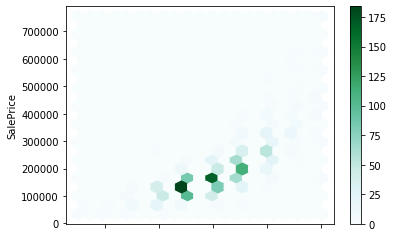

In [1037]:
train.plot.scatter(x='OverallQual', y='SalePrice')
train.plot.hexbin(x='OverallQual', y='SalePrice',  gridsize=20)

Having the results, we can see that 'OverallQual' has a somewhat exponential behavior in relation to price but the concentration is mainly on the middle numbers 4,5,6. When the overall material and finish of the house is high quality, we have a bigger range for housr prices. With this bahavior, we can see that the value for this feature is different for different prices. Hence, we can see that this value is actually very influential on the price. This feature and the price are heavily correlated, since knowing the 'OverallQual' we can to some degreee determine the price.

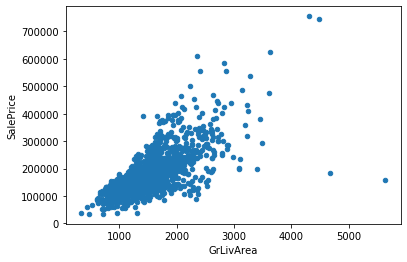

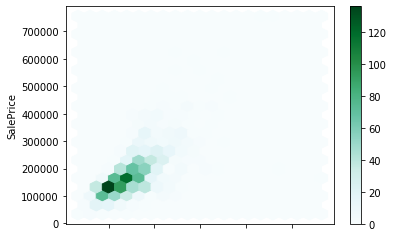

In [1038]:
train.plot.scatter(x='GrLivArea', y='SalePrice')
train.plot.hexbin(x='GrLivArea', y='SalePrice',  gridsize=20)

We can see that for 'GrLivArea' most houses have around 500 to 2000 square feet above grade (ground) living area. It is portraited that the more the 'GrLivArea', the more range of prices there is for the houses. With this scattered and likelike bahavior, we can see that the value for this feature is actually very influential on the price. 

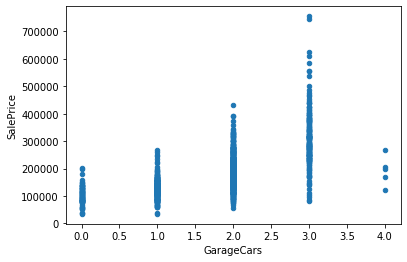

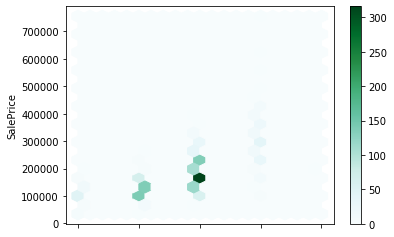

In [1039]:
train.plot.scatter(x='GarageCars', y='SalePrice')
train.plot.hexbin(x='GarageCars', y='SalePrice',  gridsize=20)

For Size of garage in car capacity, we can see that it is scattered somewhat evenly with the concentraition mainly on 3. Also, we have more varying prices for the houses that have more car capacity. We can see how this feature heavily influences the price.

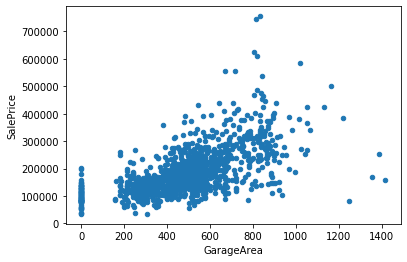

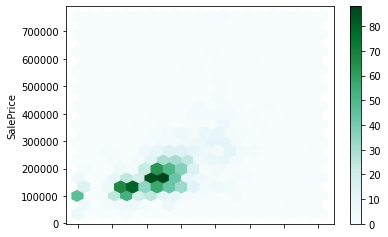

In [1040]:
train.plot.scatter(x='GarageArea', y='SalePrice')
train.plot.hexbin(x='GarageArea', y='SalePrice',  gridsize=20)

we can see that Size of garage in square feet is also concentrated on the 200 to 600 and we have varying prices for houses with the same garage area. It is clear that this feature is very correlated with the price.

q7.

In my opinion, 'MSSubClass', 'OverallQual: ' ,and 'BsmtFinSF1' are the most influential factors on the price.

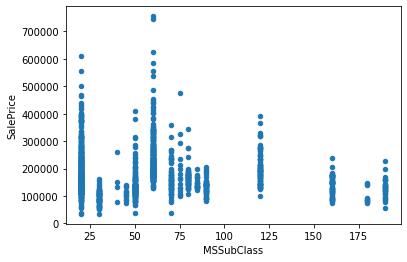

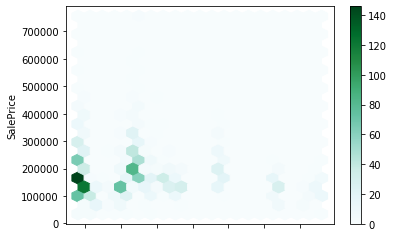

In [1041]:
train.plot.scatter(x='MSSubClass', y='SalePrice')
train.plot.hexbin(x='MSSubClass', y='SalePrice',  gridsize=20)

We can see that this feature is not a good feature since for the same 'MSSubClass', we can have very different house prices.

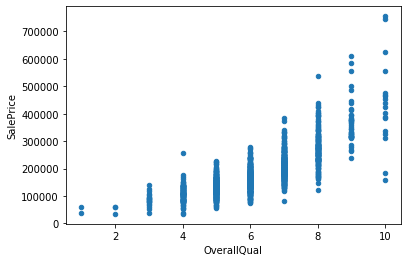

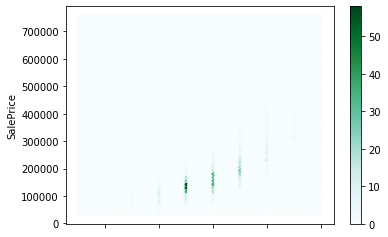

In [1042]:
train.plot.scatter(x='OverallQual', y='SalePrice')
train.plot.hexbin(x='OverallQual', y='SalePrice')

We can observe that this feature is a comparably a good feature since knowing the 'OverallQual', we can have a particular range for the price.

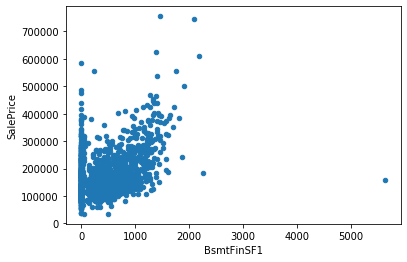

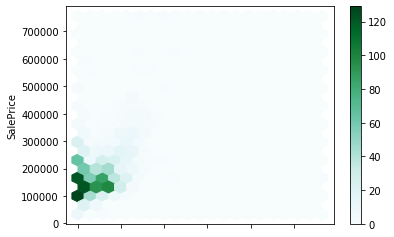

In [1043]:
train.plot.scatter(x='BsmtFinSF1', y='SalePrice')
train.plot.hexbin(x='BsmtFinSF1', y='SalePrice',  gridsize=20)

This feature is also not a good one because knowing the 'BsmtFinSF1', we have a very wide range for the price.

q8.

Phase 1. In this phase, we preprocess the data to remove lost or wrong datas that might cause eerors. This phase is the most important part of learning.

Phase 1.

q1. 
We can delete the whole row, if we have a large enough dataset.
As the second way, We can also replace the missing value with the average of that feature. This methond is not recommended since in most casses it reduces the variability of the data. 
There are other methods we can consider too. One of them being educated guessing. For example, if most values of the column has the same value, we can infer that the missing value has the same value as others do.
we can also use Regression Substitution, in which we try to predict the missing value based on other values. But we need enough data to be able to form stable regression equations. 
Another way which is the most complicated but most popular is Multiple Imputation. In this method we take andvantage of the correlations.

q2. We have seen that five features 'LotFrontage', 'GarageYrBlt', 'MasVnrType', 'MasVnrArea', 'Electrical' have lost values. Considering the perventage of lost data from Phase 0 part 2 we see that since four features 'GarageYrBlt', 'MasVnrType', 'MasVnrArea', 'Electrical' have little lost datas, we can remove the faulty rows and for 'LotFrontage' since we have a lot of missing datas, we can replace them with average of the column.

In [1044]:
count_nan.sort_values().tail(50)

BsmtQual           0
Utilities          0
YearRemodAdd       0
MSSubClass         0
ExterCond          0
LotShape           0
Condition1         0
LandSlope          0
LandContour        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
CentralAir         0
SaleCondition      0
Heating            0
TotalBsmtSF        0
TotRmsAbvGrd       0
Functional         0
KitchenQual        0
YrSold             0
SalePrice          0
HeatingQC          0
BsmtFinSF2         0
EnclosedPorch      0
Fireplaces         0
GarageCars         0
GarageArea         0
PavedDrive         0
SaleType           0
WoodDeckSF         0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
OpenPorchSF        0
PoolQC             0
Electrical         1
MasVnrArea         8
MasVnrType   

In [1045]:
in_GarageYrBlt = list(np.where(train['GarageYrBlt'].isnull())[0])
in_MasVnrType = list(np.where(train['MasVnrType'].isnull())[0])
in_MasVnrArea = list(np.where(train['MasVnrArea'].isnull())[0])
in_Electrical = list(np.where(train['Electrical'].isnull())[0])
in_LotFrontage = list(np.where(train['LotFrontage'].isnull())[0])
print(len(in_GarageYrBlt), len(in_MasVnrType), len(in_MasVnrArea), len(in_Electrical))

81 8 8 1


we can see counts of missing datas match with the number of missing datas that we had. 

In [1046]:
all_toberemoved_index_four_least = in_GarageYrBlt + in_MasVnrType + in_MasVnrArea + in_Electrical

In [1047]:
all_toberemoved_index = in_GarageYrBlt + in_MasVnrType + in_MasVnrArea + in_Electrical + in_LotFrontage

Here we remove the duplicate indexes.

In [1048]:
all_toberemoved_index_four_least = list(set(all_toberemoved_index_four_least)) 
all_toberemoved_index = list(set(all_toberemoved_index)) 

In [1049]:
train_preprocess_four_least_removed=train.copy(deep=True)
train_all_lost_remove=train.copy(deep=True)
train_all_replaced=train.copy(deep=True)

In [1050]:
train_preprocess_four_least_removed = train_preprocess_four_least_removed.drop(all_toberemoved_index_four_least)

In [1051]:
train_preprocess_four_least_removed.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1447         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1448         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1447     12   2007        WD         Normal     240000  
1448      5   2007        WD         Normal     112000  
1451      5   2009       New        Partial     287090  
1452      5   2006        WD         Normal     145000  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[10 rows x 81 columns]

We can see that chosen rows have beeb removed.
Now we need to replace missing datas from 'LotFrontage' with the average of the column.

In [1052]:
train_preprocess_four_least_removed['LotFrontage'].tail(20)

1437    96.0
1438    90.0
1439    80.0
1440    79.0
1441     NaN
1442    85.0
1443     NaN
1444    63.0
1445    70.0
1446     NaN
1447    80.0
1448    70.0
1451    78.0
1452    35.0
1454    62.0
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, dtype: float64

In [1053]:
train_preprocess_four_least_removed['LotFrontage'] = train_preprocess_four_least_removed['LotFrontage'].fillna(train_preprocess_four_least_removed['LotFrontage'].mean())

In [1054]:
train_preprocess_four_least_removed.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1447         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1448         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1447     12   2007        WD         Normal     240000  
1448      5   2007        WD         Normal     112000  
1451      5   2009       New        Partial     287090  
1452      5   2006        WD         Normal     145000  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[10 rows x 81 columns]

We can see the NAs have been replaced with mean of the column.
In order to compare the results later on, we need to produce datas with different type of preprocessing. 
Now we proceed with producing other preprocessed datasets. 


In [1055]:
train_all_lost_remove = train_all_lost_remove.drop(all_toberemoved_index)

In [1056]:
train_all_lost_remove.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1447         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1448         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1447     12   2007        WD         Normal     240000  
1448      5   2007        WD         Normal     112000  
1451      5   2009       New        Partial     287090  
1452      5   2006        WD         Normal     145000  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[10 rows x 81 columns]

Here we replace all the numeric feature values with the mean of their column and for nominal features which are 'MasVnrType' and 'Electrical', we replace them with their most repeated value. 

In [1057]:
print(train_all_replaced['MasVnrType'][529]) #for checking
print(train_all_replaced['Electrical'][1379])

nan
nan


In [1058]:
to_replace_nan_string = train_all_replaced['MasVnrType'].value_counts().idxmax() 
train_all_replaced['MasVnrType'] = train_all_replaced['MasVnrType'].fillna(to_replace_nan_string)
to_replace_nan_string = train_all_replaced['Electrical'].value_counts().idxmax() 
train_all_replaced['Electrical'] = train_all_replaced['Electrical'].fillna(to_replace_nan_string)

In [1059]:
print(train_all_replaced['MasVnrType'][529])
print(train_all_replaced['Electrical'][1379])

None
SBrkr


In [1060]:
train_all_replaced['GarageYrBlt'].tail(10)

1450       NaN
1451    2008.0
1452    2005.0
1453       NaN
1454    2004.0
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, dtype: float64

In [1061]:
train_all_replaced['LotFrontage'] = train_all_replaced['LotFrontage'].fillna(train_all_replaced['LotFrontage'].mean())
train_all_replaced['GarageYrBlt'] = train_all_replaced['GarageYrBlt'].fillna(train_all_replaced['GarageYrBlt'].mean())
train_all_replaced['MasVnrArea'] = train_all_replaced['MasVnrArea'].fillna(train_all_replaced['MasVnrArea'].mean())

In [1062]:
train_all_replaced['GarageYrBlt'].tail(10)

1450    1978.506164
1451    2008.000000
1452    2005.000000
1453    1978.506164
1454    2004.000000
1455    1999.000000
1456    1978.000000
1457    1941.000000
1458    1950.000000
1459    1965.000000
Name: GarageYrBlt, dtype: float64

Now we have 4 different kind of data which will help us with analyzing later on.

q3. 
Through data normalization, we can get rid of any duplicate data. It also helps clean up the data which would make its analyzation and visualization easier. We can also logically group the datas that are related. There are also other benefits. Normalization helps data take up less space. With less space taken up, our performance could improve. It will be easier to change or update data. we can also use datas from different sources easier and without having t deal with their differences.
Standardization helps us compare measurements that have different units.
With these explanation and the fact that in this project visualization matters, we need to normalize our dataset. But before we do that, we need to handle non-numeric features.

In [1063]:
def normalize(data):
    list_of_nominal = list(data.keys()[list(np.where((data.dtypes!=np.object)))])
    list_of_nominal.remove('SalePrice')
    for col in list_of_nominal:
        data[col] = (data[col]-data[col].min())/(data[col].max()-data[col].min())
    return data

In [1064]:
normalize(train).head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0  0.000000    0.235294       RL     0.150685  0.033420   Pave   NaN      Reg   
1  0.000685    0.000000       RL     0.202055  0.038795   Pave   NaN      Reg   
2  0.001371    0.235294       RL     0.160959  0.046507   Pave   NaN      IR1   
3  0.002056    0.294118       RL     0.133562  0.038561   Pave   NaN      IR1   
4  0.002742    0.235294       RL     0.215753  0.060576   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0   
1         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0   
2         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0   
3         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0   
4         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0  0.090909   0.50        WD         Normal     208500  
1  0.363636   0.25        WD         Normal     181500  
2  0.727273   0.50        WD         Normal     223500  
3  0.090909   0.00        WD        Abnorml     140000  
4  1.000000   0.50        WD         Normal     250000  

[5 rows x 81 columns]

q4. The answer to this question depends on the kind of nun-numeric feature that we have. For binary featues, we can use replace() function to replace them with one and zero. For Ordinal Feature, we use integer encoding inwhich we convert labels to integer values using map() function from pandas. For nominal features, we use one hot encoding. We should have in mind that integer encoding does not work here, and lead to poor model performance.
Having this information we can decide how to encode each feature. 
Having read the dataset, we can decide that all categorical features be handled with one hot method.
We will try deleting all categorical data and replacing them to see how they change the result. 

In [1065]:
def one_hot_encoding(data):
    to_be_encoded = data.keys()[list(np.where((data.dtypes==np.object)))]
    for key in to_be_encoded:
         data = pd.get_dummies(data,prefix=[key], columns = [key], drop_first=True)
    return data



In [1066]:
one_hot_encoding(train).keys()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=247)

As we can see, the categorical features have been replaced.

In [1067]:
def remove_cat(data):
    return data.drop(columns=(data.keys()[list(np.where((data.dtypes==np.object)))]))

In [1068]:
remove_cat(train)

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0     0.000000    0.235294     0.150685  0.033420     0.666667        0.500   
1     0.000685    0.000000     0.202055  0.038795     0.555556        0.875   
2     0.001371    0.235294     0.160959  0.046507     0.666667        0.500   
3     0.002056    0.294118     0.133562  0.038561     0.666667        0.500   
4     0.002742    0.235294     0.215753  0.060576     0.777778        0.500   
...        ...         ...          ...       ...          ...          ...   
1455  0.997258    0.235294     0.140411  0.030929     0.555556        0.500   
1456  0.997944    0.000000     0.219178  0.055505     0.555556        0.625   
1457  0.998629    0.294118     0.154110  0.036187     0.666667        1.000   
1458  0.999315    0.000000     0.160959  0.039342     0.444444        0.625   
1459  1.000000    0.000000     0.184932  0.040370     0.444444        0.625   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0      0.949275      0.883333    0.122500    0.125089  ...    0.000000   
1      0.753623      0.433333    0.000000    0.173281  ...    0.347725   
2      0.934783      0.866667    0.101250    0.086109  ...    0.000000   
3      0.311594      0.333333    0.000000    0.038271  ...    0.000000   
4      0.927536      0.833333    0.218750    0.116052  ...    0.224037   
...         ...           ...         ...         ...  ...         ...   
1455   0.920290      0.833333    0.000000    0.000000  ...    0.000000   
1456   0.768116      0.633333    0.074375    0.139972  ...    0.407235   
1457   0.500000      0.933333    0.000000    0.048724  ...    0.000000   
1458   0.565217      0.766667    0.000000    0.008682  ...    0.427071   
1459   0.673913      0.250000    0.000000    0.147059  ...    0.858810   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0        0.111517       0.000000        0.0          0.0       0.0  0.00000   
1        0.000000       0.000000        0.0          0.0       0.0  0.00000   
2        0.076782       0.000000        0.0          0.0       0.0  0.00000   
3        0.063985       0.492754        0.0          0.0       0.0  0.00000   
4        0.153565       0.000000        0.0          0.0       0.0  0.00000   
...           ...            ...        ...          ...       ...      ...   
1455     0.073126       0.000000        0.0          0.0       0.0  0.00000   
1456     0.000000       0.000000        0.0          0.0       0.0  0.00000   
1457     0.109689       0.000000        0.0          0.0       0.0  0.16129   
1458     0.000000       0.202899        0.0          0.0       0.0  0.00000   
1459     0.124314       0.000000        0.0          0.0       0.0  0.00000   

        MoSold  YrSold  SalePrice  
0     0.090909    0.50     208500  
1     0.363636    0.25     181500  
2     0.727273    0.50     223500  
3     0.090909    0.00     140000  
4     1.000000    0.50     250000  
...        ...     ...        ...  
1455  0.636364    0.25     175000  
1456  0.090909    1.00     210000  
1457  0.363636    1.00     266500  
1458  0.272727    1.00     142125  
1459  0.454545    0.50     147500  

[1460 rows x 38 columns]

q5. No, we do not need to keep all the features since there are features that have little or no correlation with the price. Using part 3 of phase 0 we can find these features. For example we can choose features that have a correlation greater than 0.5. 

In [1069]:
def remove_uncorrelated(data, a): # a shows how much you want to cut if could be a number between 0 and 1 like 0.5
    cor_target_train = cor_show(data)
    to_removed_features = cor_target_train[cor_target_train<a]
    return data.drop(columns=to_removed_features.keys())

q6. For the value of p, there are common split percentages of training data to testing data that we can use like 80% to 20%, 67% to 33% ,and 50% to 50%. If our dataset is not very big, it is better to have more data for training, but if we have a big dataset, we do not have to worry about this problem. 
We do need to split the dataset randomly. This way, we can make sure that both training data and testin data are the representative of the original dataset. 
For this part, we can use sklearn.model_selection for splitting.

In [1070]:
def splitting(data,  test_size_r, random_state_r):
    train_to_be_split=data.copy(deep=True)
    train_x = train_to_be_split.drop(columns=['SalePrice'])
    if 'Id' not in train_x.keys():
        train_x = train_to_be_split.drop(columns=['SalePrice'])
    train_y = train_to_be_split.pop('SalePrice')
    return train_test_split(train_x, train_y, test_size = test_size_r, random_state = random_state_r)



In [1071]:
x_train, x_test, y_train, y_test =splitting(remove_cat(train_all_lost_remove),0.33,42)

In [1072]:
x_train

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
891    892          60         70.0    11184            6            5   
814    815          50         45.0     8248            5            7   
578    579         160         34.0     3604            7            5   
571    572          20         60.0     7332            6            6   
1075  1076          70         75.0    13125            7            6   
...    ...         ...          ...      ...          ...          ...   
598    599          20         80.0    12984            5            6   
162    163          20         95.0    12182            7            5   
1364  1365         160         30.0     3180            7            5   
1427  1428          50         60.0    10930            5            6   
1114  1115          20         90.0     5400            5            7   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
891        1978          1978        92.0         226  ...         440   
814        1918          1950         0.0           0  ...         280   
578        2007          2007         0.0           0  ...         540   
571        1959          1959       207.0         414  ...         288   
1075       1940          1984         0.0         410  ...         240   
...         ...           ...         ...         ...  ...         ...   
598        1977          1977       459.0        1283  ...         621   
162        2005          2005       226.0        1201  ...         532   
1364       2005          2005         0.0           0  ...         480   
1427       1945          1950         0.0         580  ...         288   
1114       1954          2000         0.0         415  ...         326   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
891          243            0              0          0            0   
814          207            0             96          0            0   
578            0          102              0          0            0   
571          168            0              0          0            0   
1075           0            0              0          0            0   
...          ...          ...            ...        ...          ...   
598            0            0              0          0            0   
162            0           70              0          0            0   
1364           0          166              0          0            0   
1427           0            0              0          0            0   
1114           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
891          0        0       7    2009  
814          0        0       7    2006  
578          0        0       2    2008  
571          0        0      10    2006  
1075         0        0       7    2007  
...        ...      ...     ...     ...  
598          0        0       3    2006  
162          0        0       5    2010  
1364         0        0       4    2006  
1427         0        0       4    2008  
1114         0        0       8    2006  

[750 rows x 37 columns]

In [1073]:
y_train

891     172500
814     116000
578     146000
571     120000
1075    219500
         ...  
598     217500
162     220000
1364    144152
1427    140000
1114    117000
Name: SalePrice, Length: 750, dtype: int64

We can see how the data can be splited which will be useful for future analysis.

Phase 2. 
In this phase we build models and try to predict outcomes based on those models. We also compare the accuray of different models.

q1. In this part we build function that would help caculate accuracy of different models. In this part we only operate on one kind preprocessed data inwhich rows that had nan  and categorical features have been removed 

In [1074]:
x_test.head(1)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
315  316          60         71.0     7795            7            5   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
315       2004          2005         0.0         425  ...         432   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
315         100           51              0          0            0         0   

     MiscVal  MoSold  YrSold  
315        0       7    2009  

[1 rows x 37 columns]

In [1075]:
def knc_predict(x_train_f, x_test_f, y_train_f, num_neighbors):
    scaler = StandardScaler()
    scaler.fit(x_train_f)
    x_train_f = scaler.transform(x_train_f)
    x_test_f = scaler.transform(x_test_f)
    knc = KNeighborsClassifier(n_neighbors=num_neighbors)
    knc.fit(x_train_f, y_train_f)
    return knc.predict(x_test_f)

In [1076]:
def dt_predict(x_train_g, x_test_g, y_train_g, l):
    dtc = DecisionTreeClassifier(max_depth=l)
    dtc.fit(x_train_g, y_train_g)
    return dtc.predict(x_test_g)

In [1077]:
def lr_predict(x_train_h, x_test_h, y_train_h):
    lrc = LinearRegression() 
    lrc.fit(x_train_h, y_train_h) 
    return lrc.predict(x_test_h)

In [1078]:
def print_error(y_t, y_p):
    mse = mean_squared_error(y_t, y_p)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_t, y_p)
    print('rmse',rmse)
    print('mae',mae)

In [1079]:
def error(yt,yp):
    msee = mean_squared_error(yt, yp)
    rmsee = math.sqrt(msee)
    maee = mean_absolute_error(yt, yp)
    return rmsee, maee

In [1080]:
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,10)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,100)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)

In [1081]:
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 70080.6091592177
mae 46430.66216216216
dtc
rmse 60764.05165434042
mae 38559.62972972973
lrc
rmse 49966.99230103296
mae 23966.438506207716


For this example, we can see that linear regression has the least error.

q2. In this part we try to Find the best value for the hyperparameter using grid search.

In [1082]:
def dt_hyper(x_train_a, x_test_a, y_train_a, y_test_a):
    rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
    pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))
    depths = np.arange(1,30)
    param_grid = [{'decisiontreeregressor__max_depth':depths}]
    gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer)
    gs = gs.fit(x_train_a, y_train_a)
    print(-gs.best_score_)
    print(gs.best_params_)
    my_model = gs.best_estimator_
    my_model.fit(x_train_a, y_train_a)
    y_predicted_a = my_model.predict(x_test_a)
    mse = mean_squared_error(y_test_a, y_predicted_a)
    rmse = math.sqrt(mse)
    return gs.best_params_

In [1083]:
bestdt = dt_hyper(x_train, x_test, y_train, y_test)

40531.089692382826
{'decisiontreeregressor__max_depth': 7}


In [1084]:
def knn_hyper(x_train_b, x_test_b, y_train_b, y_test_b):
    n_neighbors = list(range(1,30))
    hyperparameters = dict(n_neighbors=n_neighbors)
    knn_2 = KNeighborsClassifier()
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)
    best_model = clf.fit(x_train_b,y_train_b)
    print(best_model)
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
    my_model = clf.best_estimator_
    my_model.fit(x_train_b, y_train_b)
    y_predicted_b = my_model.predict(x_test_b)
    mse = mean_squared_error(y_test_b, y_predicted_b)
    rmse = math.sqrt(mse)
    return clf.best_estimator_

In [1085]:
bestknn = knn_hyper(x_train, x_test, y_train, y_test)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})
Best n_neighbors: 1


In [1086]:
def plot_hyper_dt(x_train_p,y_train_p,x_test_p,y_test_p):
    rmse_list_dt=[]
    mae_list_dt=[]
    for i in range(1,30):
        dtc = DecisionTreeClassifier(max_depth=i)
        dtc.fit(x_train_p, y_train_p)
        y_test_predi = dtc.predict(x_test_p)
        rmsee_p , maee_p = error(y_test_p,y_test_predi)
        rmse_list_dt.append(rmsee_p)
        mae_list_dt.append(maee_p)
    x=range(1,30)
    plt.plot(x,rmse_list_dt,'r')
    plt.plot(x,mae_list_dt,'b')

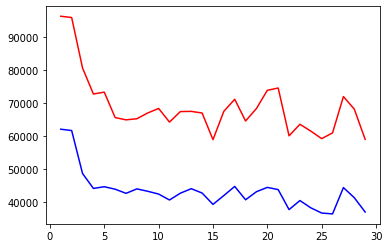

In [1087]:
plot_hyper_dt(x_train,y_train,x_test,y_test)

In [1088]:
def plot_hyper_knn(x_train_p,y_train_p,x_test_p,y_test_p):
    rmse_list_dt=[]
    mae_list_dt=[]
    for i in range(1,30):
        scaler = StandardScaler()
        scaler.fit(x_train_p)
        x_train_p = scaler.transform(x_train_p)
        x_test_p = scaler.transform(x_test_p)
        knc = KNeighborsClassifier(n_neighbors=i)
        knc.fit(x_train_p, y_train_p)
        y_test_predi = knc.predict(x_test_p)
        rmsee_p , maee_p = error(y_test_p,y_test_predi)
        rmse_list_dt.append(rmsee_p)
        mae_list_dt.append(maee_p)
    x=range(1,30)
    plt.plot(x,rmse_list_dt,'r')
    plt.plot(x,mae_list_dt,'b')

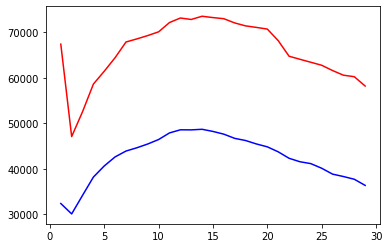

In [1089]:
plot_hyper_knn(x_train,y_train,x_test,y_test)

We can see the plots match with grid search.

q3. TO find out if we have underfitting or overfitting, we need to used validation. To to so, we split our data to 2 parts, each time leaving a part out as valisation. Based on the validation scores we decide if out model is fit or not. 
For knn we have n=1 and for decision tree we have depth=7.

In [1090]:
x_train_1, x_test_1, y_train_1, y_test_1 =splitting(remove_cat(train_all_lost_remove),0.5,0)

In [1091]:
x_test_2, x_train_2, y_test_2, y_train_2 =splitting(remove_cat(train_all_lost_remove),0.5,0)

In [1092]:
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,1)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,7)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)

knc
rmse 67375.4453508422
mae 32380.645945945947
dtc
rmse 64410.546379749314
mae 42394.22432432432


It can be see that the errors are not considerably different, so we can conclude that our models do not overfit or underfit.

q4. 
For this part, we will analyze multiple ways of preprocessing and compare their results.

train_preprocess_four_least_removed=train.copy(deep=True)
train_all_lost_remove=train.copy(deep=True)
train_all_replaced=train.copy(deep=True)

First, we work on the data inwhich all the rows including a missing value have been removed. It has not been normalized, all the gategorical features have been removed, all the features are included and it is split by 80 to 20 for training and testing without randomization. 

In [1093]:
def cor_show(df):
    cor = df.corr()
    #Correlation with output variable
    cor_target = abs(cor['SalePrice'])
    return cor_target

In [1094]:
n=1
b=7

In [1095]:
x_train, x_test, y_train, y_test = splitting(remove_cat(train_all_lost_remove),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 42192.221593823684
mae 27689.34375
dtc
rmse 54704.954092222244
mae 34386.044642857145
lrc
rmse 32358.702410031576
mae 22619.578649112715


We try using different ratios for training and testing.

In [1096]:
x_train, x_test, y_train, y_test = splitting(remove_cat(train_all_lost_remove),0.33, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 44922.13421330712
mae 29180.95945945946
dtc
rmse 72636.32834866914
mae 44879.52162162162
lrc
rmse 35248.89025621782
mae 23767.061638072406


In [1097]:
x_train, x_test, y_train, y_test = splitting(remove_cat(train_all_lost_remove),0.5, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 43983.3600405556
mae 28673.589285714286
dtc
rmse 63878.90520551646
mae 39338.64464285714
lrc
rmse 43783.304103487935
mae 27637.040395780718


We can see with more training data compared to testing data, we can get better results.
Now we repeat the same things only we impelement normalization too.

In [1098]:
x_train, x_test, y_train, y_test = splitting(normalize(remove_cat(train_all_lost_remove)),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 42192.221593823684
mae 27689.34375
dtc
rmse 53609.1343088447
mae 33048.200892857145
lrc
rmse 32358.70241003139
mae 22619.57864911245


In [1099]:
x_train, x_test, y_train, y_test = splitting(normalize(remove_cat(train_all_lost_remove)),0.33, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 44922.13421330712
mae 29180.95945945946
dtc
rmse 74791.11856708801
mae 45729.035135135135
lrc
rmse 35248.088182967396
mae 23771.640910550064


In [1100]:
x_train, x_test, y_train, y_test = splitting(normalize(remove_cat(train_all_lost_remove)),0.5, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 43983.3600405556
mae 28673.589285714286
dtc
rmse 64110.10633017287
mae 39658.64464285714
lrc
rmse 43783.30410348484
mae 27637.04039577936


In [1101]:
x_train, x_test, y_train, y_test = splitting(normalize(remove_cat(train_all_lost_remove)),0.5, 42)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 62271.82133473087
mae 31273.223214285714
dtc
rmse 63959.13556831759
mae 41412.078571428574
lrc
rmse 51187.12689481754
mae 24679.761734703217


We can see that in this dataset randomization produces worse results. 

By comparing to not normalized results, we can see that normalization does not affect knn method noticeably. It does worsen the results for decision tree but makes if better for linear regresion. 
From now on for splitting we use 0.2 for testing since the results show clearly that more training data provides for better results and better generalizaion.
Now we try with removing the features that are less correlated with output.

In [1102]:
x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(remove_cat(train_all_lost_remove),0.5),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 42067.73573007415
mae 27825.401785714286
dtc
rmse 57527.954531129595
mae 38913.580357142855
lrc
rmse 36195.26674607454
mae 23877.57932533215


we can see by leaving out more features, knc becomes better but other features still worsen. 

In [1103]:
x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(remove_cat(train_all_lost_remove),0.2),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 40180.63269630034
mae 24579.214285714286
dtc
rmse 54598.70991129441
mae 35885.03125
lrc
rmse 33143.65257308333
mae 22270.449431044257


we can see that knc stays almost the same but other models become worse. This is because we are removing features that are important for decision making. 

Now we use hot one encoding instead of removing categorical data. 

In [1104]:
x_train, x_test, y_train, y_test = splitting(one_hot_encoding(train_all_lost_remove),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 46715.79825023062
mae 31059.03125
dtc
rmse 61554.536445443184
mae 40694.200892857145
lrc
rmse 53888.57953357681
mae 25604.80840632174


we can see all the models worsen. The conclusion is that for this data set, removing categorical data seems to work better.

In [1105]:
x_train, x_test, y_train, y_test = splitting(normalize(one_hot_encoding(train_all_lost_remove)),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 46715.79825023062
mae 31059.03125
dtc
rmse 61527.58594423318
mae 40573.107142857145
lrc
rmse 7319584532384780.0
mae 1148970652162082.5


We see normalizign does not change the knc, worsens lrc, but seems to slightly improve dtc.

In [1106]:
x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(one_hot_encoding(train_all_lost_remove),0.5),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 41939.257500804066
mae 28377.76339285714
dtc
rmse 57483.07654649323
mae 39026.86607142857
lrc
rmse 36123.68412553473
mae 23827.710456618548


In this case, removing less related features has made the results improve vastly. 
Now we use the data inwhich only the rows are deleted that are from the feature that has the most missing values. Rest of the features are replaced. 

In [1107]:
x_train, x_test, y_train, y_test = splitting(remove_cat(train_preprocess_four_least_removed),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 57199.87395419602
mae 31290.879562043796
dtc
rmse 59454.80252756072
mae 36279.75912408759
lrc
rmse 50015.93985891789
mae 22562.226899034147


In [1108]:
x_train, x_test, y_train, y_test = splitting(normalize(remove_cat(train_preprocess_four_least_removed)),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 57199.87395419602
mae 31290.879562043796
dtc
rmse 59401.9233063741
mae 36260.78102189781
lrc
rmse 50015.939858918064
mae 22562.22689903388


normalization does not change the results. 

In [1109]:
x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(remove_cat(train_preprocess_four_least_removed),0.5),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 39892.438226339786
mae 26848.306569343065
dtc
rmse 68909.34271883317
mae 41259.970802919706
lrc
rmse 48388.32441881522
mae 23781.067767564997


removing uncorrelated features, improves knc and lrc but worsens dtc.

In [1110]:
x_train, x_test, y_train, y_test = splitting(one_hot_encoding(train_preprocess_four_least_removed),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 48186.9874099428
mae 32761.981751824816
dtc
rmse 62654.96167442254
mae 39159.788321167885
lrc
rmse 45568.94464780855
mae 20364.343056887352


Encoding only worsens dtc and mekes others work better. 

In [1111]:
x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(one_hot_encoding(train_preprocess_four_least_removed),0.5),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 41468.15695491212
mae 28405.405109489053
dtc
rmse 68687.17843305903
mae 40930.40875912409
lrc
rmse 48137.14016761548
mae 23739.628775855483


Removing less related data only worsens dtc and mekes others work better. 

Now we work with the data inwhich all the features have been replaced and no rows have been removen.

In [1112]:
x_train, x_test, y_train, y_test = splitting(remove_cat(train_all_replaced),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 55679.61320037914
mae 29865.931506849316
dtc
rmse 68733.19550373103
mae 41413.78424657534
lrc
rmse 50273.08757734546
mae 23965.105980522345


With the same preprocessing as other, this data works like the data inwhich rows have been removen. This is probably bacause our data set is big.

In [1113]:
x_train, x_test, y_train, y_test = splitting(normalize(remove_cat(train_all_replaced)),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 55679.61320037914
mae 29865.931506849316
dtc
rmse 68814.45868338272
mae 41750.69520547945
lrc
rmse 50273.087577346196
mae 23965.105980521832


normalizing does not change the performance. 

In [1114]:
x_train, x_test, y_train, y_test = splitting(one_hot_encoding(train_all_replaced),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 54487.8792730517
mae 32810.73630136986
dtc
rmse 66194.24061812533
mae 41563.76369863014
lrc
rmse 60114.28280916515
mae 22590.048887454668


One hot encoding worsens the results for lrs.

In [1115]:
x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(one_hot_encoding(train_all_replaced),0.5),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 42020.24268844589
mae 27647.45205479452
dtc
rmse 65332.28546795033
mae 40063.52739726027
lrc
rmse 49668.93694957396
mae 25830.081616131447


In [1116]:
x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(remove_cat(train_all_lost_remove),0.5),0.2, 0)
y_test_predicted_knc = knc_predict(x_train, x_test, y_train,n)
y_test_predicted_dtc = dt_predict(x_train, x_test, y_train,b)
y_test_predicted_lrc = lr_predict(x_train, x_test, y_train)
print('knc')
print_error(y_test, y_test_predicted_knc)
print('dtc')
print_error(y_test, y_test_predicted_dtc)
print('lrc')
print_error(y_test, y_test_predicted_lrc)

knc
rmse 42067.73573007415
mae 27825.401785714286
dtc
rmse 56473.826743962934
mae 38227.75892857143
lrc
rmse 36195.26674607454
mae 23877.57932533215


Removing categorical data sees to make models work better. 

In general,normalization does not affect the results. More training data produces better results but choosing random worsens the model. Removing categorical data improves knc but worses others. Encoding only makes dtc better. removing less related features as long as we do not overdo it, improves results. 

Phase 3.

q1.In this part, we use random forest to generate a better model.

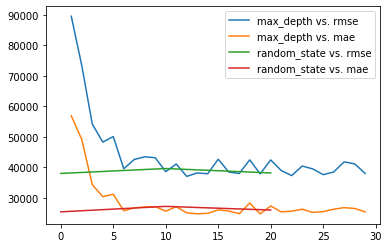

38017.809991197355
25422.23214285714


In [1117]:
max_depth_rmse = []
max_depth_mae = []
for i in range(1,30):
    x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(remove_cat(train_all_lost_remove),0.5),0.2, 0)
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(x_train, y_train)
    y_test_predicted_knc = clf.predict(x_test)
    #print('knc')
    #print_error(y_test, y_test_predicted_knc)
    rmse, mae= error(y_test, y_test_predicted_knc)
    max_depth_rmse.append(rmse)
    max_depth_mae.append(mae)
random_state_rmse = []
random_state_mae = []
for k in range(3):
    x_train, x_test, y_train, y_test = splitting(remove_uncorrelated(remove_cat(train_all_lost_remove),0.5),0.2, 0)
    clf = RandomForestClassifier(max_depth=i, random_state=3*k)
    clf.fit(x_train, y_train)
    y_test_predicted_knc = clf.predict(x_test)
    #print('knc')
    #print_error(y_test, y_test_predicted_knc)
    rmse, mae= error(y_test, y_test_predicted_knc)
    random_state_rmse.append(rmse)
    random_state_mae.append(mae)
plt.plot(range(1,30),max_depth_rmse ,label='max_depth vs. rmse')
plt.plot(range(1,30),max_depth_mae,label='max_depth vs. mae')
plt.plot(range(0,30,10),random_state_rmse,label='random_state vs. rmse')
plt.plot(range(0,30,10),random_state_mae,label='random_state vs. mae')
plt.legend()
plt.show()
print(min(random_state_rmse))
print(min(random_state_mae))

we can see after a while the number for both features becomes stable. So, for max_depth we choose 5 and for random_state we choose 0. Compared to the decision trees we have prodiced before, random forest results in better errors. 

q2. In this part, we use voting regression to achieve a better model. In this method, we use a model which is an average of the threee models we previously made. 

In [1118]:
r1 = KNeighborsRegressor(n_neighbors=1)
r2 = DecisionTreeRegressor(max_depth=7)
r3 = LinearRegression()
er = VotingRegressor([('knn', r1), ('dt', r2), ('lr', r3)])
er.fit(x_train, y_train)
y_test_predicted = er.predict(x_test)
print_error(y_test,y_test_predicted)

rmse 33898.7963679205
mae 21661.948366567558


We can observe that the resutls improve.

q3. In our case, voting regression improves the resutls. This is because using voting, we get the predictions from multiple models and average over them. This results in less error, since different models may work better for some datas and not for others. This way we make sure that we eliminate this factor. By using different models, we can make sure to get good results no matter the model. We can prove this point by comparing the results with other models. 
Here we use Gaussian Naive Bayes.


In [1119]:
g = GaussianNB()
g.fit(x_train, y_train)
y_test_predicted = g.predict(x_test)
print_error(y_test,y_test_predicted)

rmse 45978.38932250634
mae 29713.022321428572


As we can see, voting regression works better than other models too. This is because by averaging over predictions of multiple models, we get all the features needed to predict a very good result for each data. 